- 1. 내가 올린 dataset0219 에서 본번 부번 없는거 없애거 int로 바꿔놓고 해라 그리고 아파트명 없는거 채워넣기
- 2. 날씬이에 있는 것을 뚱땡이 본번 부번에 있는 거와 맵핑하기

In [2]:
!pip install tqdm
from tqdm import trange, notebook 

import pandas as pd

pd.set_option('display.max_columns', None)  # 모든 열 출력

- 결측치 있는 컬럼과 결측치 갯수 count 해서 시각화

In [4]:
csv_file_0219 = "dataset0219_complete.csv"
df_dataset = pd.read_csv(csv_file_0219, low_memory=False)

print(f"총 행 수: {df_dataset.shape[0]}")
df_dataset.isna().sum().sort_values(ascending=True)

총 행 수: 548385


Unnamed: 0.1                0
        변동형 주택담보대출          0
        고정형 주택담보대출          0
계약연월                        0
계정항목(날짜)                    0
한국은행 기준금리                   0
계약일(날짜)                     0
자치구법정동코드                    0
건물면적정수                      0
건물용도                        0
서울5대학군지여부                   0
건물면적(㎡)                     0
물건금액(만원)                    0
전국아파트입주물량(수도권)              0
접수연도                        0
계약일                         0
자치구명                        0
자치구코드                       0
법정동명                        0
법정동코드                       0
인덱스                         0
Unnamed: 0                  0
자치구최근6개월평균금액               47
동최근6개월거래량                  47
동최근6개월평균금액                 47
자치구최근6개월거래량                47
건축년도                     3123
층                       33221
부번                      33260
본번                      33260
지번구분명                   33272
지번구분                    33272
건물명                     33275
토지면적(㎡)   

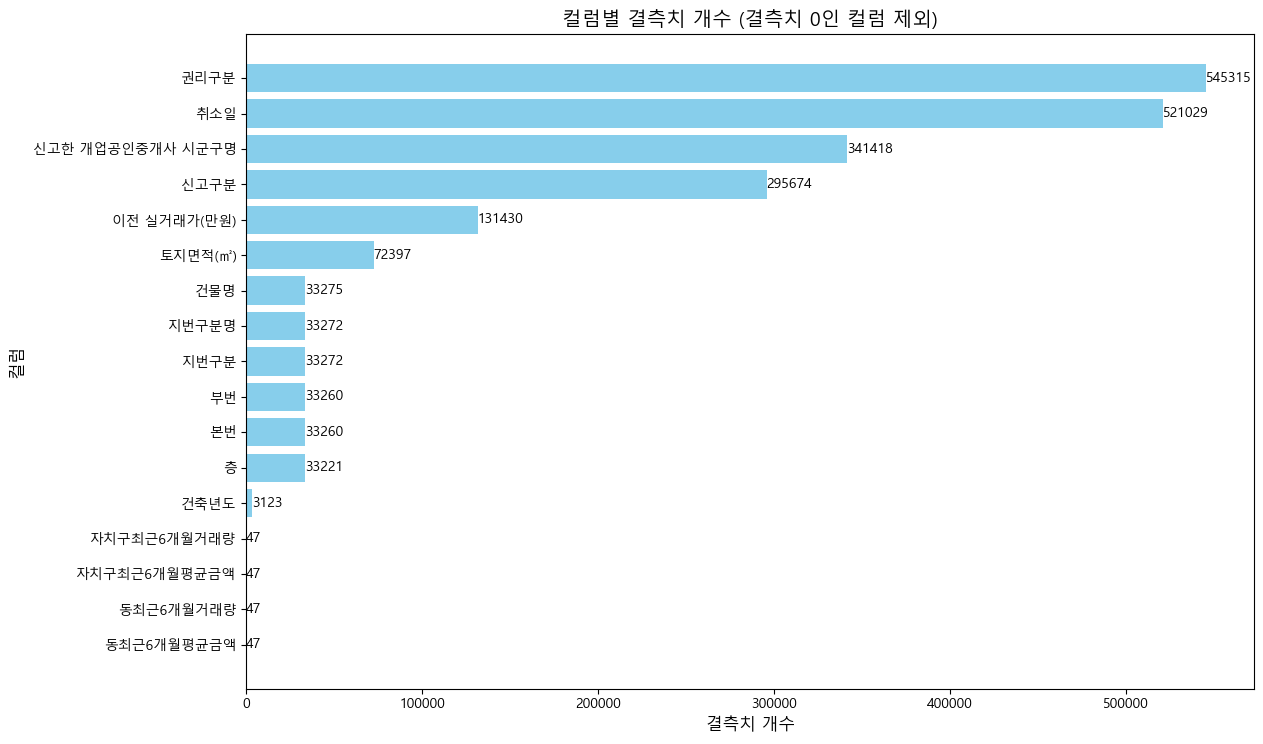

In [7]:
# 결측치 개수를 막대그래프로 시각화
# 데이터프레임에서 결측치가 있는 컬럼을 추출한 후, matplotlib과 seaborn을 사용하여 막대그래프를 그림.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")  # Windows 사용자의 경우

# 결측치 개수 계산 (0보다 큰 값만 필터링)
missing_values = df_dataset.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)  # 0인 컬럼 제외

# 그래프 크기 설정
plt.figure(figsize=(13, len(missing_values) * 0.5))  # 컬럼 수에 따라 동적 크기 조정

# 가로 막대그래프
bars = plt.barh(missing_values.index, missing_values, color="skyblue")

for bar, original_value in zip(bars, missing_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(original_value), va="center", fontsize=10)


# 그래프 설정
plt.title("컬럼별 결측치 개수 (결측치 0인 컬럼 제외)", fontsize=14)
plt.xlabel("결측치 개수", fontsize=12)
plt.ylabel("컬럼", fontsize=12)
plt.gca().invert_yaxis()  #  결측치가 많은 컬럼이 위에서부터 표시되도록 조정

plt.show()

- 본번 부번 없는 건물 삭제하기 + 본번 부번은 없는데 건물명은 있으면 건물명에 값 찾아서 넣기

In [10]:
# '본번'과 '부번'이 둘 다 결측치인 행 개수
both_missing_count = df_dataset[df_dataset[['본번', '부번']].isna().all(axis=1)].shape[0]
print(f"본번 & 부번이 둘 다 결측치인 행 개수: {both_missing_count}")

# 제거될 행 개수와 남은 행 개수 확인
will_remain_rows = len(df_dataset) - both_missing_count
print(f"제거되고 남을 행 개수: {len(df_dataset)} - {both_missing_count} = {will_remain_rows}")

본번 & 부번이 둘 다 결측치인 행 개수: 33260
제거되고 남을 행 개수: 548385 - 33260 = 515125


In [12]:
# '본번'과 '부번' 컬럼에 값이 없는(결측치가 있는) 행 제거
df_cleaned = df_dataset.dropna(subset=['본번', '부번'])

# 제거된 행 개수와 남은 행 개수 확인
removed_rows = len(df_dataset) - len(df_cleaned)
remaining_rows = len(df_cleaned)

# 결과 출력
print(f"본번 & 부번 결측치인 행 개수: {both_missing_count}")
print(f"제거된 행 개수: {removed_rows}")
print(f"남은 행 개수: {remaining_rows}")

본번 & 부번 결측치인 행 개수: 33260
제거된 행 개수: 33260
남은 행 개수: 515125


In [14]:
print(f"총 행 수: {df_cleaned.shape[0]}")

# # '본번'과 '부번'을 int 형식으로 변환 (결측치는 우선 0으로 채움)
df_cleaned.loc[:, '본번'] = pd.to_numeric(df_cleaned['본번'], errors='coerce').fillna(0).astype(int)
df_cleaned.loc[:, '부번'] = pd.to_numeric(df_cleaned['부번'], errors='coerce').fillna(0).astype(int)

df_cleaned['본번'] = df_cleaned['본번'].astype(int)
df_cleaned['부번'] = df_cleaned['부번'].astype(int)

print(df_cleaned.dtypes)


총 행 수: 515125
Unnamed: 0.1             int64
Unnamed: 0               int64
인덱스                      int64
접수연도                     int64
자치구코드                    int64
자치구명                    object
법정동코드                    int64
법정동명                    object
지번구분                   float64
지번구분명                   object
본번                       int32
부번                       int32
건물명                     object
계약일                      int64
물건금액(만원)                 int64
건물면적(㎡)                float64
토지면적(㎡)                float64
층                      float64
권리구분                    object
취소일                    float64
건축년도                   float64
건물용도                    object
신고구분                    object
신고한 개업공인중개사 시군구명        object
건물면적정수                   int64
이전 실거래가(만원)            float64
자치구최근6개월거래량            float64
자치구최근6개월평균금액           float64
동최근6개월거래량              float64
동최근6개월평균금액             float64
자치구법정동코드                 int64
계약일(날짜)                 o

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14728\1379853961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['본번'] = df_cleaned['본번'].astype(int)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14728\1379853961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['부번'] = df_cleaned['부번'].astype(int)


In [16]:
df_cleaned.loc[(df_cleaned['법정동명'] == '개포동') & (df_cleaned['본번'] == 1194) & (df_cleaned['부번'] == 1)].head()

,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
306023,306023,240262,240264,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,NaN,20211213,69500,46.47,67.07,7.0,NaN,20220120.0,2021.0,오피스텔,직거래,NaN,46,NaN,4304.0,40994.0641,661.0,40996.6021,1168010300,2021-12-13,1.00,2021-12-13,202112,3.58,3.76,1.0,"12,519"
313945,313945,234444,234446,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,NaN,20220120,69500,46.47,67.07,7.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,46,69500.0,2437.0,129608.1026,74.0,175243.5405,1168010300,2022-01-20,1.25,2022-01-20,202201,3.83,3.92,1.0,"17,865"
314368,314368,234028,234030,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220122,69200,28.14,18.24,6.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,28,NaN,1489.0,66397.3949,435.0,52228.0460,1168010300,2022-01-22,1.25,2022-01-21,202201,3.83,3.92,1.0,"17,865"
322319,322319,226087,226089,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,NaN,20220306,52500,31.40,45.33,8.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 강남구,31,NaN,1558.0,33960.2362,298.0,31956.7718,1168010300,2022-03-06,1.25,2022-03-04,202203,3.84,3.82,1.0,"8,983"
325616,325616,222788,222790,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,NaN,20220322,54500,31.40,45.33,7.0,NaN,20220519.0,2021.0,오피스텔,직거래,NaN,31,52500.0,2802.0,39070.9019,335.0,33200.2239,1168010300,2022-03-22,1.25,2022-03-22,202203,3.84,3.82,1.0,"8,983"


In [18]:
missing_building_name_count = df_cleaned['건물명'].isna().sum()
print(f"건물명 결측치 개수: {missing_building_name_count}")

df_cleaned[df_cleaned['건물명'].isna()].head()

건물명 결측치 개수: 67


,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
302284,302284,246356,246360,2021,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20211127,28532,16.88,29.90,17.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,NaN,3590.0,40909.5560,1026.0,39421.3012,1121510700,2021-11-27,1.0,2021-11-26,202111,3.55,3.41,0.0,"11,716"
304375,304375,244482,244486,2021,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20211207,28671,16.88,29.90,15.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,28532.0,2536.0,77841.3742,349.0,52589.9398,1121510700,2021-12-07,1.0,2021-12-07,202112,3.58,3.76,0.0,"12,519"
306023,306023,240262,240264,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,NaN,20211213,69500,46.47,67.07,7.0,NaN,20220120.0,2021.0,오피스텔,직거래,NaN,46,NaN,4304.0,40994.0641,661.0,40996.6021,1168010300,2021-12-13,1.0,2021-12-13,202112,3.58,3.76,1.0,"12,519"
306674,306674,242675,242679,2021,11590,동작구,10700,사당동,1.0,대지,182,3,NaN,20211216,30350,29.99,36.23,5.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,29,31500.0,1938.0,75998.6703,399.0,74127.2431,1159010700,2021-12-16,1.0,2021-12-16,202112,3.58,3.76,0.0,"12,519"
306677,306677,242671,242675,2021,11590,동작구,10700,사당동,1.0,대지,182,3,NaN,20211216,30350,29.99,36.23,6.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,29,31500.0,1938.0,75998.6703,399.0,74127.2431,1159010700,2021-12-16,1.0,2021-12-16,202112,3.58,3.76,0.0,"12,519"


In [20]:
# 건물명이 결측치인 행을 다시 확인
df_building_name_miss = df_cleaned[df_cleaned['건물명'].isna() | (df_cleaned['건물명'].astype(str).str.strip() == '')]

print( df_building_name_miss.shape[0])
df_building_name_miss.to_csv("건물명_결측치데이터_csv.csv", index=False)
df_building_name_miss.to_excel('건물명_결측치데이터_엑셀.xlsx')

print(df_building_name_miss[['본번', '부번']].dtypes)
df_building_name_miss

67
본번    int32
부번    int32
dtype: object


,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
302284,302284,246356,246360,2021,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20211127,28532,16.88,29.90,17.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,NaN,3590.0,40909.5560,1026.0,39421.3012,1121510700,2021-11-27,1.0,2021-11-26,202111,3.55,3.41,0.0,"11,716"
304375,304375,244482,244486,2021,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20211207,28671,16.88,29.90,15.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,28532.0,2536.0,77841.3742,349.0,52589.9398,1121510700,2021-12-07,1.0,2021-12-07,202112,3.58,3.76,0.0,"12,519"
306023,306023,240262,240264,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,NaN,20211213,69500,46.47,67.07,7.0,NaN,20220120.0,2021.0,오피스텔,직거래,NaN,46,NaN,4304.0,40994.0641,661.0,40996.6021,1168010300,2021-12-13,1.0,2021-12-13,202112,3.58,3.76,1.0,"12,519"
306674,306674,242675,242679,2021,11590,동작구,10700,사당동,1.0,대지,182,3,NaN,20211216,30350,29.99,36.23,5.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,29,31500.0,1938.0,75998.6703,399.0,74127.2431,1159010700,2021-12-16,1.0,2021-12-16,202112,3.58,3.76,0.0,"12,519"
306677,306677,242671,242675,2021,11590,동작구,10700,사당동,1.0,대지,182,3,NaN,20211216,30350,29.99,36.23,6.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,29,31500.0,1938.0,75998.6703,399.0,74127.2431,1159010700,2021-12-16,1.0,2021-12-16,202112,3.58,3.76,0.0,"12,519"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411791,411791,136597,136599,2023,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20230711,48500,27.82,48.71,19.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,27,47000.0,1053.0,69063.6306,92.0,35437.5000,1121510700,2023-07-11,3.5,2023-07-11,202307,4.25,4.57,0.0,"17,063"
417033,417033,131360,131362,2023,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20230803,26000,16.88,29.90,18.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,28600.0,1071.0,70206.9767,90.0,36539.4444,1121510700,2023-08-03,3.5,2023-08-03,202308,4.28,4.63,0.0,"13,246"
418375,418375,130019,130021,2023,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20230810,24500,16.88,29.90,5.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,26000.0,1100.0,70077.7927,103.0,36055.8252,1121510700,2023-08-10,3.5,2023-08-10,202308,4.28,4.63,0.0,"13,246"
428751,428751,119640,119641,2023,11215,광진구,10700,화양동,1.0,대지,111,12,NaN,20230921,24150,16.88,29.90,9.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구,16,24500.0,1203.0,73769.3616,104.0,32787.5000,1121510700,2023-09-21,3.5,2023-09-21,202309,4.33,4.61,0.0,"9,675"


In [21]:
file_path = "건물명_결측치데이터.csv"
df_building_fill = pd.read_csv(file_path, low_memory=False)

# '건물명' 컬럼이 NaN인 행을 찾아 빈 문자열로 변경
df_building_fill['건물명'] = df_building_fill['건물명'].fillna('')
df_building_fill.tail()

,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
62,411811,136599,2023,11215,광진구,10700,화양동,1,대지,111,12,빌리브인테라스,20230711,48500,27.82,48.71,19,NaN,NaN,2021,오피스텔,중개거래,서울 광진구,27,47000.0,1053,69063.6306,92,35437.5000,2023-07-11,3.5,2023-07-11,202307,4.25,4.57,0,"17,063"
63,417053,131362,2023,11215,광진구,10700,화양동,1,대지,111,12,빌리브인테라스,20230803,26000,16.88,29.90,18,NaN,NaN,2021,오피스텔,중개거래,서울 광진구,16,28600.0,1071,70206.9767,90,36539.4444,2023-08-03,3.5,2023-08-03,202308,4.28,4.63,0,"13,246"
64,418395,130021,2023,11215,광진구,10700,화양동,1,대지,111,12,빌리브인테라스,20230810,24500,16.88,29.90,5,NaN,NaN,2021,오피스텔,중개거래,서울 광진구,16,26000.0,1100,70077.7927,103,36055.8252,2023-08-10,3.5,2023-08-10,202308,4.28,4.63,0,"13,246"
65,428772,119641,2023,11215,광진구,10700,화양동,1,대지,111,12,빌리브인테라스,20230921,24150,16.88,29.90,9,NaN,NaN,2021,오피스텔,중개거래,서울 광진구,16,24500.0,1203,73769.3616,104,32787.5000,2023-09-21,3.5,2023-09-21,202309,4.33,4.61,0,"9,675"
66,500242,48163,2024,11740,강동구,10100,명일동,1,대지,121,0,,20240720,44500,46.65,33.00,1,NaN,NaN,1986,연립다세대,중개거래,서울 강동구,46,NaN,2937,90060.2220,283,103510.7774,2024-07-20,3.5,2024-07-19,202407,3.48,4.12,0,"2,810"


In [24]:
# 매핑을 위한 키 생성 (자치구명, 법정동명, 본번, 부번을 하나의 문자열로 결합)
df_cleaned['매핑키'] = (
    df_cleaned['자치구명'].astype(str) + "_" +
    df_cleaned['법정동명'].astype(str) + "_" +
    df_cleaned['본번'].astype(str) + "_" +
    df_cleaned['부번'].astype(str)
)

df_building_fill['매핑키'] = (
    df_building_fill['자치구명'].astype(str) + "_" +
    df_building_fill['법정동명'].astype(str) + "_" +
    df_building_fill['본번'].astype(str) + "_" +
    df_building_fill['부번'].astype(str)
)

# 매핑 딕셔너리 생성 (매핑키 → 건물명)
mapping_dict = df_building_fill.set_index('매핑키')['건물명'].to_dict()
mapping_dict

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14728\622162747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['매핑키'] = (


{'광진구_화양동_111_12': '빌리브인테라스',
 '강남구_개포동_1194_1': '런던빌개포',
 '동작구_사당동_182_3': 'STUDIO사당35',
 '금천구_시흥동_888_14': '신영메트로시티',
 '양천구_신정동_988_5': '목동중앙하이츠펠리시티',
 '강동구_명일동_121_0': ''}

In [25]:
# df_cleaned에서 건물명이 없는 경우 df_building_fill의 값으로 채우기
df_cleaned.loc[df_cleaned['건물명'].isna() | (df_cleaned['건물명'].astype(str).str.strip() == ''), '건물명'] = \
    df_cleaned['매핑키'].map(mapping_dict) # 매핑키를 사용하여 mapping_dict에서 건물명을 찾아 적용

df_cleaned.loc[(df_cleaned['법정동명'] == '개포동') & (df_cleaned['본번'] == 1194) & (df_cleaned['부번'] == 1)]

,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권),매핑키
306023,306023,240262,240264,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20211213,69500,46.47,67.07,7.0,NaN,20220120.0,2021.0,오피스텔,직거래,NaN,46,NaN,4304.0,40994.0641,661.0,40996.6021,1168010300,2021-12-13,1.00,2021-12-13,202112,3.58,3.76,1.0,"12,519",강남구_개포동_1194_1
313945,313945,234444,234446,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220120,69500,46.47,67.07,7.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,46,69500.0,2437.0,129608.1026,74.0,175243.5405,1168010300,2022-01-20,1.25,2022-01-20,202201,3.83,3.92,1.0,"17,865",강남구_개포동_1194_1
314368,314368,234028,234030,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220122,69200,28.14,18.24,6.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,28,NaN,1489.0,66397.3949,435.0,52228.0460,1168010300,2022-01-22,1.25,2022-01-21,202201,3.83,3.92,1.0,"17,865",강남구_개포동_1194_1
322319,322319,226087,226089,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220306,52500,31.40,45.33,8.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 강남구,31,NaN,1558.0,33960.2362,298.0,31956.7718,1168010300,2022-03-06,1.25,2022-03-04,202203,3.84,3.82,1.0,"8,983",강남구_개포동_1194_1
325616,325616,222788,222790,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220322,54500,31.40,45.33,7.0,NaN,20220519.0,2021.0,오피스텔,직거래,NaN,31,52500.0,2802.0,39070.9019,335.0,33200.2239,1168010300,2022-03-22,1.25,2022-03-22,202203,3.84,3.82,1.0,"8,983",강남구_개포동_1194_1
330842,330842,217569,217571,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220411,53500,32.28,46.60,8.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,32,NaN,1927.0,50329.4868,688.0,39873.6613,1168010300,2022-04-11,1.25,2022-04-11,202204,3.98,3.77,1.0,"7,099",강남구_개포동_1194_1
334026,334026,214385,214387,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220422,54500,32.28,46.60,7.0,NaN,20220722.0,2021.0,오피스텔,직거래,NaN,32,53500.0,1999.0,128666.5153,255.0,169756.9843,1168010300,2022-04-22,1.50,2022-04-22,202204,3.98,3.77,1.0,"7,099",강남구_개포동_1194_1
334511,334511,213922,213924,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220424,69200,28.14,18.24,5.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,28,69200.0,1145.0,52496.6480,242.0,51337.1818,1168010300,2022-04-24,1.50,2022-04-22,202204,3.98,3.77,1.0,"7,099",강남구_개포동_1194_1
341521,341521,206900,206902,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220519,53500,31.40,45.33,7.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,31,54500.0,1353.0,32712.9904,331.0,30337.8338,1168010300,2022-05-19,1.50,2022-05-19,202205,4.02,3.77,1.0,"16,569",강남구_개포동_1194_1
343647,343647,204764,204766,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220526,47000,23.44,13.29,6.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,23,NaN,1226.0,58529.1737,379.0,34288.1451,1168010300,2022-05-26,1.75,2022-05-26,202205,4.02,3.77,1.0,"16,569",강남구_개포동_1194_1


In [28]:
# 매핑 후 불필요한 '매핑키' 컬럼 제거
df_cleaned = df_cleaned.drop(columns=['매핑키'])

# 변경된 데이터 확인
df_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
0,0,548310,548332,2020,11290,성북구,13600,하월곡동,1.0,대지,222,0,월곡두산위브,20200101,61900,84.77,NaN,11.0,NaN,NaN,2003.0,아파트,NaN,NaN,84,65300.0,4192.0,44427.6880,893.0,40519.3953,1129013600,2020-01-01,1.25,2019-12-31,202001,2.42,2.9,0.0,"12,532"
1,1,548392,548414,2020,11380,은평구,10400,갈현동,1.0,대지,432,7,"거성리젠시(103,104동)",20200101,34000,55.82,32.77,3.0,NaN,NaN,2017.0,연립다세대,NaN,NaN,55,NaN,4198.0,44464.0510,1307.0,40554.1232,1138010400,2020-01-01,1.25,2019-12-31,202001,2.42,2.9,0.0,"12,532"
2,2,548391,548413,2020,11620,관악구,10100,봉천동,1.0,대지,635,368,동신빌,20200101,31000,44.59,29.81,5.0,NaN,NaN,2016.0,연립다세대,NaN,NaN,44,33300.0,3424.0,47165.7564,1373.0,41254.2535,1162010100,2020-01-01,1.25,2019-12-31,202001,2.42,2.9,0.0,"12,532"
3,3,548390,548412,2020,11350,노원구,10300,공릉동,1.0,대지,747,0,두산힐스빌아파트,20200101,52000,84.90,NaN,1.0,NaN,NaN,2000.0,아파트,NaN,NaN,84,58500.0,2689.0,35200.7107,743.0,26283.1252,1135010300,2020-01-01,1.25,2019-12-31,202001,2.42,2.9,0.0,"12,532"
4,4,548389,548411,2020,11470,양천구,10200,목동,1.0,대지,941,0,대원칸타빌2,20200101,98000,84.98,NaN,14.0,NaN,NaN,2003.0,아파트,NaN,NaN,84,103000.0,3260.0,35860.0610,1324.0,41265.8399,1147010200,2020-01-01,1.25,2019-12-31,202001,2.42,2.9,1.0,"12,532"


In [30]:
# 본번 부번 0 인 행들의 자치구코드와 법정동코드로 뚱땡이에서 찾아서 채워넣기
df_cleaned.loc[(df_cleaned['자치구코드'] == 11650) & (df_cleaned['법정동코드'] == 10900) & (df_cleaned['본번'] == 0) & (df_cleaned['부번'] == 0)].head()


,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
16535,16535,531871,531893,2020,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20200208,105000,59.21,NaN,13.0,NaN,NaN,2015.0,아파트,NaN,NaN,59,96000.0,3146.0,126993.7368,353.0,62333.9263,1165010900,2020-02-08,1.25,2020-02-07,202002,2.47,2.74,1.0,"21,491"
23022,23022,525629,525650,2020,11650,서초구,10900,내곡동,3.0,블럭,0,0,서초 케이타운 오피스텔,20200220,19000,21.58,21.58,4.0,NaN,NaN,2017.0,오피스텔,NaN,NaN,21,19900.0,4993.0,62991.7158,401.0,98555.2718,1165010900,2020-02-20,1.25,2020-02-20,202002,2.47,2.74,1.0,"21,491"
31366,31366,517026,517047,2020,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20200307,126500,84.48,NaN,20.0,NaN,NaN,2015.0,아파트,NaN,NaN,84,124000.0,7000.0,43597.4737,1522.0,49601.5440,1165010900,2020-03-07,1.25,2020-03-06,202003,2.43,2.66,1.0,"11,109"
72520,72520,475941,475962,2020,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20200613,130000,84.48,NaN,14.0,NaN,NaN,2015.0,아파트,NaN,NaN,84,126500.0,2583.0,53950.4321,328.0,66778.4146,1165010900,2020-06-13,0.50,2020-06-12,202006,2.52,2.43,1.0,"10,142"
88252,88252,460167,460187,2020,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20200630,130000,84.87,NaN,14.0,NaN,NaN,2015.0,아파트,NaN,NaN,84,130000.0,3418.0,66045.8906,141.0,47838.5106,1165010900,2020-06-30,0.50,2020-06-30,202006,2.52,2.43,1.0,"10,142"


In [32]:
df_cleaned.loc[(df_cleaned['법정동명'] == '개포동') & (df_cleaned['본번'] == 1194) & (df_cleaned['부번'] == 1)]

,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
306023,306023,240262,240264,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20211213,69500,46.47,67.07,7.0,NaN,20220120.0,2021.0,오피스텔,직거래,NaN,46,NaN,4304.0,40994.0641,661.0,40996.6021,1168010300,2021-12-13,1.00,2021-12-13,202112,3.58,3.76,1.0,"12,519"
313945,313945,234444,234446,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220120,69500,46.47,67.07,7.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,46,69500.0,2437.0,129608.1026,74.0,175243.5405,1168010300,2022-01-20,1.25,2022-01-20,202201,3.83,3.92,1.0,"17,865"
314368,314368,234028,234030,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220122,69200,28.14,18.24,6.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,28,NaN,1489.0,66397.3949,435.0,52228.0460,1168010300,2022-01-22,1.25,2022-01-21,202201,3.83,3.92,1.0,"17,865"
322319,322319,226087,226089,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220306,52500,31.40,45.33,8.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 강남구,31,NaN,1558.0,33960.2362,298.0,31956.7718,1168010300,2022-03-06,1.25,2022-03-04,202203,3.84,3.82,1.0,"8,983"
325616,325616,222788,222790,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220322,54500,31.40,45.33,7.0,NaN,20220519.0,2021.0,오피스텔,직거래,NaN,31,52500.0,2802.0,39070.9019,335.0,33200.2239,1168010300,2022-03-22,1.25,2022-03-22,202203,3.84,3.82,1.0,"8,983"
330842,330842,217569,217571,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220411,53500,32.28,46.60,8.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,32,NaN,1927.0,50329.4868,688.0,39873.6613,1168010300,2022-04-11,1.25,2022-04-11,202204,3.98,3.77,1.0,"7,099"
334026,334026,214385,214387,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220422,54500,32.28,46.60,7.0,NaN,20220722.0,2021.0,오피스텔,직거래,NaN,32,53500.0,1999.0,128666.5153,255.0,169756.9843,1168010300,2022-04-22,1.50,2022-04-22,202204,3.98,3.77,1.0,"7,099"
334511,334511,213922,213924,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220424,69200,28.14,18.24,5.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,28,69200.0,1145.0,52496.6480,242.0,51337.1818,1168010300,2022-04-24,1.50,2022-04-22,202204,3.98,3.77,1.0,"7,099"
341521,341521,206900,206902,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220519,53500,31.40,45.33,7.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,31,54500.0,1353.0,32712.9904,331.0,30337.8338,1168010300,2022-05-19,1.50,2022-05-19,202205,4.02,3.77,1.0,"16,569"
343647,343647,204764,204766,2022,11680,강남구,10300,개포동,1.0,대지,1194,1,런던빌개포,20220526,47000,23.44,13.29,6.0,NaN,NaN,2021.0,연립다세대,직거래,NaN,23,NaN,1226.0,58529.1737,379.0,34288.1451,1168010300,2022-05-26,1.75,2022-05-26,202205,4.02,3.77,1.0,"16,569"


In [34]:
# 본번 부번 0인거 찾아서 다 삭제해버리기

df_cleaned.loc[(df_cleaned['본번'] == 0) & (df_cleaned['부번'] == 0)]

,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)
13068,13068,535326,535348,2020,11530,구로구,11100,천왕동,3.0,블럭,0,0,랑데르,20200201,11400,22.13,31.71,6.0,NaN,NaN,2014.0,오피스텔,NaN,NaN,22,11500.0,5881.0,88646.6402,909.0,66198.3630,1153011100,2020-02-01,1.25,2020-01-31,202002,2.47,2.74,0.0,"21,491"
15220,15220,533204,533226,2020,11680,강남구,11300,율현동,3.0,블럭,0,0,훼미리타운,20200206,75000,73.28,99.10,6.0,NaN,NaN,2017.0,오피스텔,NaN,NaN,73,75000.0,2346.0,107006.3636,123.0,98755.1951,1168011300,2020-02-06,1.25,2020-02-06,202002,2.47,2.74,1.0,"21,491"
16535,16535,531871,531893,2020,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20200208,105000,59.21,NaN,13.0,NaN,NaN,2015.0,아파트,NaN,NaN,59,96000.0,3146.0,126993.7368,353.0,62333.9263,1165010900,2020-02-08,1.25,2020-02-07,202002,2.47,2.74,1.0,"21,491"
23022,23022,525629,525650,2020,11650,서초구,10900,내곡동,3.0,블럭,0,0,서초 케이타운 오피스텔,20200220,19000,21.58,21.58,4.0,NaN,NaN,2017.0,오피스텔,NaN,NaN,21,19900.0,4993.0,62991.7158,401.0,98555.2718,1165010900,2020-02-20,1.25,2020-02-20,202002,2.47,2.74,1.0,"21,491"
23282,23282,525155,525176,2020,11530,구로구,11100,천왕동,3.0,블럭,0,0,랑데르,20200220,12000,25.00,35.82,5.0,NaN,NaN,2014.0,오피스텔,NaN,NaN,25,14000.0,3363.0,41597.7841,1035.0,38956.4396,1153011100,2020-02-20,1.25,2020-02-20,202002,2.47,2.74,0.0,"21,491"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,420546,127847,127848,2023,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20230819,139000,84.48,0.00,12.0,NaN,NaN,2015.0,아파트,중개거래,서울 서초구,84,139000.0,1707.0,162425.4001,20.0,150175.0000,1165010900,2023-08-19,3.50,2023-08-18,202308,4.28,4.63,1.0,"13,246"
421258,421258,127130,127131,2023,11650,서초구,10900,내곡동,1.0,대지,0,0,서초포레스타2단지,20230822,136800,84.48,0.00,11.0,NaN,NaN,2015.0,아파트,중개거래,서울 서초구,84,139000.0,1717.0,162627.1741,21.0,149538.0952,1165010900,2023-08-22,3.50,2023-08-22,202308,4.28,4.63,1.0,"13,246"
458694,458694,89688,89688,2024,11740,강동구,10200,고덕동,3.0,블럭,0,0,고덕풍경채어바니티,20240312,110122,84.15,0.00,10.0,분양권,NaN,0.0,아파트,직거래,NaN,84,NaN,1672.0,72601.6746,175.0,120846.1257,1174010200,2024-03-12,3.50,2024-03-12,202403,3.90,4.31,0.0,"18,261"
458695,458695,89687,89687,2024,11740,강동구,10200,고덕동,3.0,블럭,0,0,고덕풍경채어바니티,20240312,89200,84.10,0.00,11.0,분양권,NaN,0.0,아파트,직거래,NaN,84,110122.0,1672.0,72601.6746,175.0,120846.1257,1174010200,2024-03-12,3.50,2024-03-12,202403,3.90,4.31,0.0,"18,261"


In [36]:
# 삭제
df_cleaned = df_cleaned.drop(df_cleaned[(df_cleaned['본번'] == 0) & (df_cleaned['부번'] == 0)].index)

In [38]:
df_cleaned.loc[(df_cleaned['본번'] == 0) & (df_cleaned['부번'] == 0)]

,Unnamed: 0.1,Unnamed: 0,인덱스,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,건물면적정수,이전 실거래가(만원),자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,자치구법정동코드,계약일(날짜),한국은행 기준금리,계정항목(날짜),계약연월,고정형 주택담보대출,변동형 주택담보대출,서울5대학군지여부,전국아파트입주물량(수도권)


In [40]:
# 삭제 완료
df_cleaned.to_csv("dataset0220_suin_2.csv", index=False)